# Load Split and Balance

## Load into Pandas

In [9]:
import numpy as np
import pandas as pd
import missingno as mn

df1 = pd.read_csv('./../acs2015_census_tract_data.csv')
df2 = pd.read_csv('./../acs2015_county_data.csv')
df3 = pd.read_csv('./../acs2017_census_tract_data.csv')
df4 = pd.read_csv('./../acs2017_county_data.csv')

frames = [df1, df2, df3, df4]

df = pd.concat(frames)
df

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,CensusId,TractId,VotingAgeCitizen,CountyId
0,1.001020e+09,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,943,77.1,18.3,4.6,0.0,5.4,NaN,NaN,NaN,NaN
1,1.001020e+09,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,753,77.0,16.9,6.1,0.0,13.3,NaN,NaN,NaN,NaN
2,1.001020e+09,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,1373,64.1,23.6,12.3,0.0,6.2,NaN,NaN,NaN,NaN
3,1.001020e+09,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,1782,75.7,21.2,3.1,0.0,10.8,NaN,NaN,NaN,NaN
4,1.001020e+09,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,5037,67.1,27.6,5.3,0.0,4.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,NaN,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,...,14234,76.2,19.3,4.3,0.2,16.8,NaN,NaN,42838.0,72145.0
3216,NaN,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,...,2927,40.7,40.9,18.4,0.0,12.8,NaN,NaN,7045.0,72147.0
3217,NaN,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,...,6873,59.2,30.2,10.4,0.2,24.8,NaN,NaN,18053.0,72149.0
3218,NaN,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,...,7878,62.7,30.9,6.3,0.0,25.4,NaN,NaN,27523.0,72151.0


<AxesSubplot:>

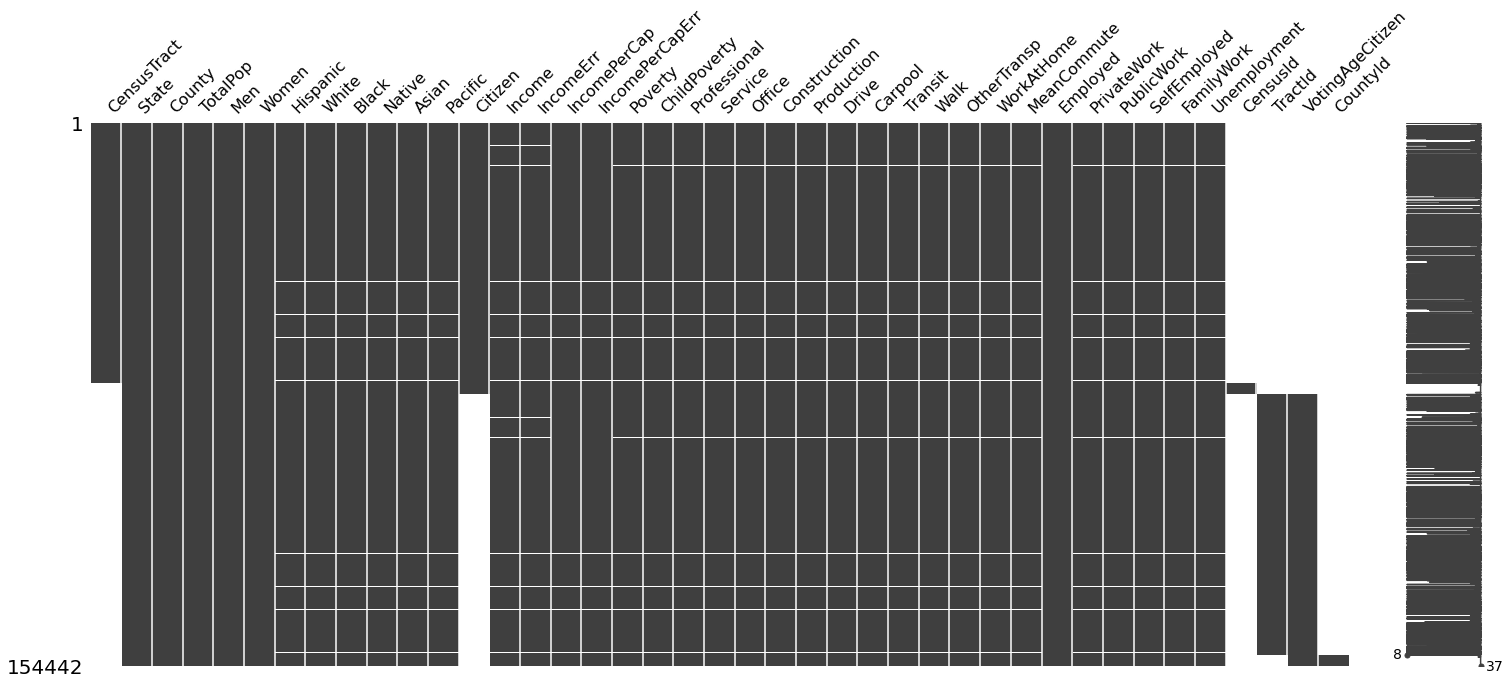

In [10]:
mn.matrix(df)

## Split the data

## Balance the data

# Pre-processing

## 2 Layer Perceptron 

### Graph Loss

## 2 Layer Perceptron with Normalize 

### Graph Loss

## 2 Layer Perceptron with One-Hot Encoding and Normalized


### Graph Loss

## Compare Results for 2 Layer Perceptrons

# Modeling
## 3 Layer
## 4 Layer
## 5 Layer


## 5 Layer Adaptive

# 5 Layer AdaM